In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk import bigrams
from collections import Counter

In [2]:
tips_data = pd.read_pickle('tips_data.pkl')
all_data = pd.read_pickle('all_data.pkl')
lyft_data = pd.read_pickle('lyft_data.pkl')

In [3]:
""" This function uses the word cloud package to create a word cloud plot which helps in visualizing """

def word_cloud_plot(text, title = "Word Cloud", mask = None):
    try:
        word_cloud = WordCloud(width=1600, height=800, max_font_size=200, mask = mask).generate(text)
    except:
        word_cloud = WordCloud(width=1600, height=800, max_font_size=200, mask = mask).fit_words(text)
        
    plt.figure(figsize=(20,15))
    plt.title(title, size = 25)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()   

In [4]:
"""This function takes in any text blob, tokenizes the blob and then extracts the bigrams from the same. 
It also gives back the Bigram count dictionary"""

def string_bigram_frequency(text_blob):
    
    tokens = word_tokenize(text_blob) #from the NLTK package
    bi_grams = []
    for txt in list(bigrams(tokens)): #bigrams is also from the NLTK package
        bi_grams.append((' '.join([word + ' ' for word in txt])).strip())
    
    all_tokens = bi_grams  + tokens
    count_dict = Counter(all_tokens) #counter is from the collections package
    
    return count_dict

In [5]:
def precent_calculation(category):
    neg_count = 0
    pos_count = 0
    for cat in category:
        if cat == 1:
            pos_count+=1
        elif cat == -1:
            neg_count+=1
    try:
        return (round((pos_count/(neg_count+pos_count))*100,2))    
    except:
        return 0

In [6]:
year_month_tips = tips_data.groupby('concat_month', as_index=False).agg({'pred_cat':precent_calculation,'polarity':'mean'}).rename(
    columns={'pred_cat':'average_sentiment', 'concat_month':'year_month', 'polarity':'mean_polarity'})

In [7]:
year_month_all = all_data.groupby('concat_month', as_index=False).agg({'pred_cat':precent_calculation,'polarity':'mean'}).rename(
    columns={'pred_cat':'average_sentiment', 'concat_month':'year_month', 'polarity':'mean_polarity'})

In [8]:
year_month_lyft = lyft_data.groupby('concat_month', as_index=False).agg({'pred_cat':precent_calculation,'polarity':'mean'}).rename(
    columns={'pred_cat':'average_sentiment', 'concat_month':'year_month', 'polarity':'mean_polarity'})

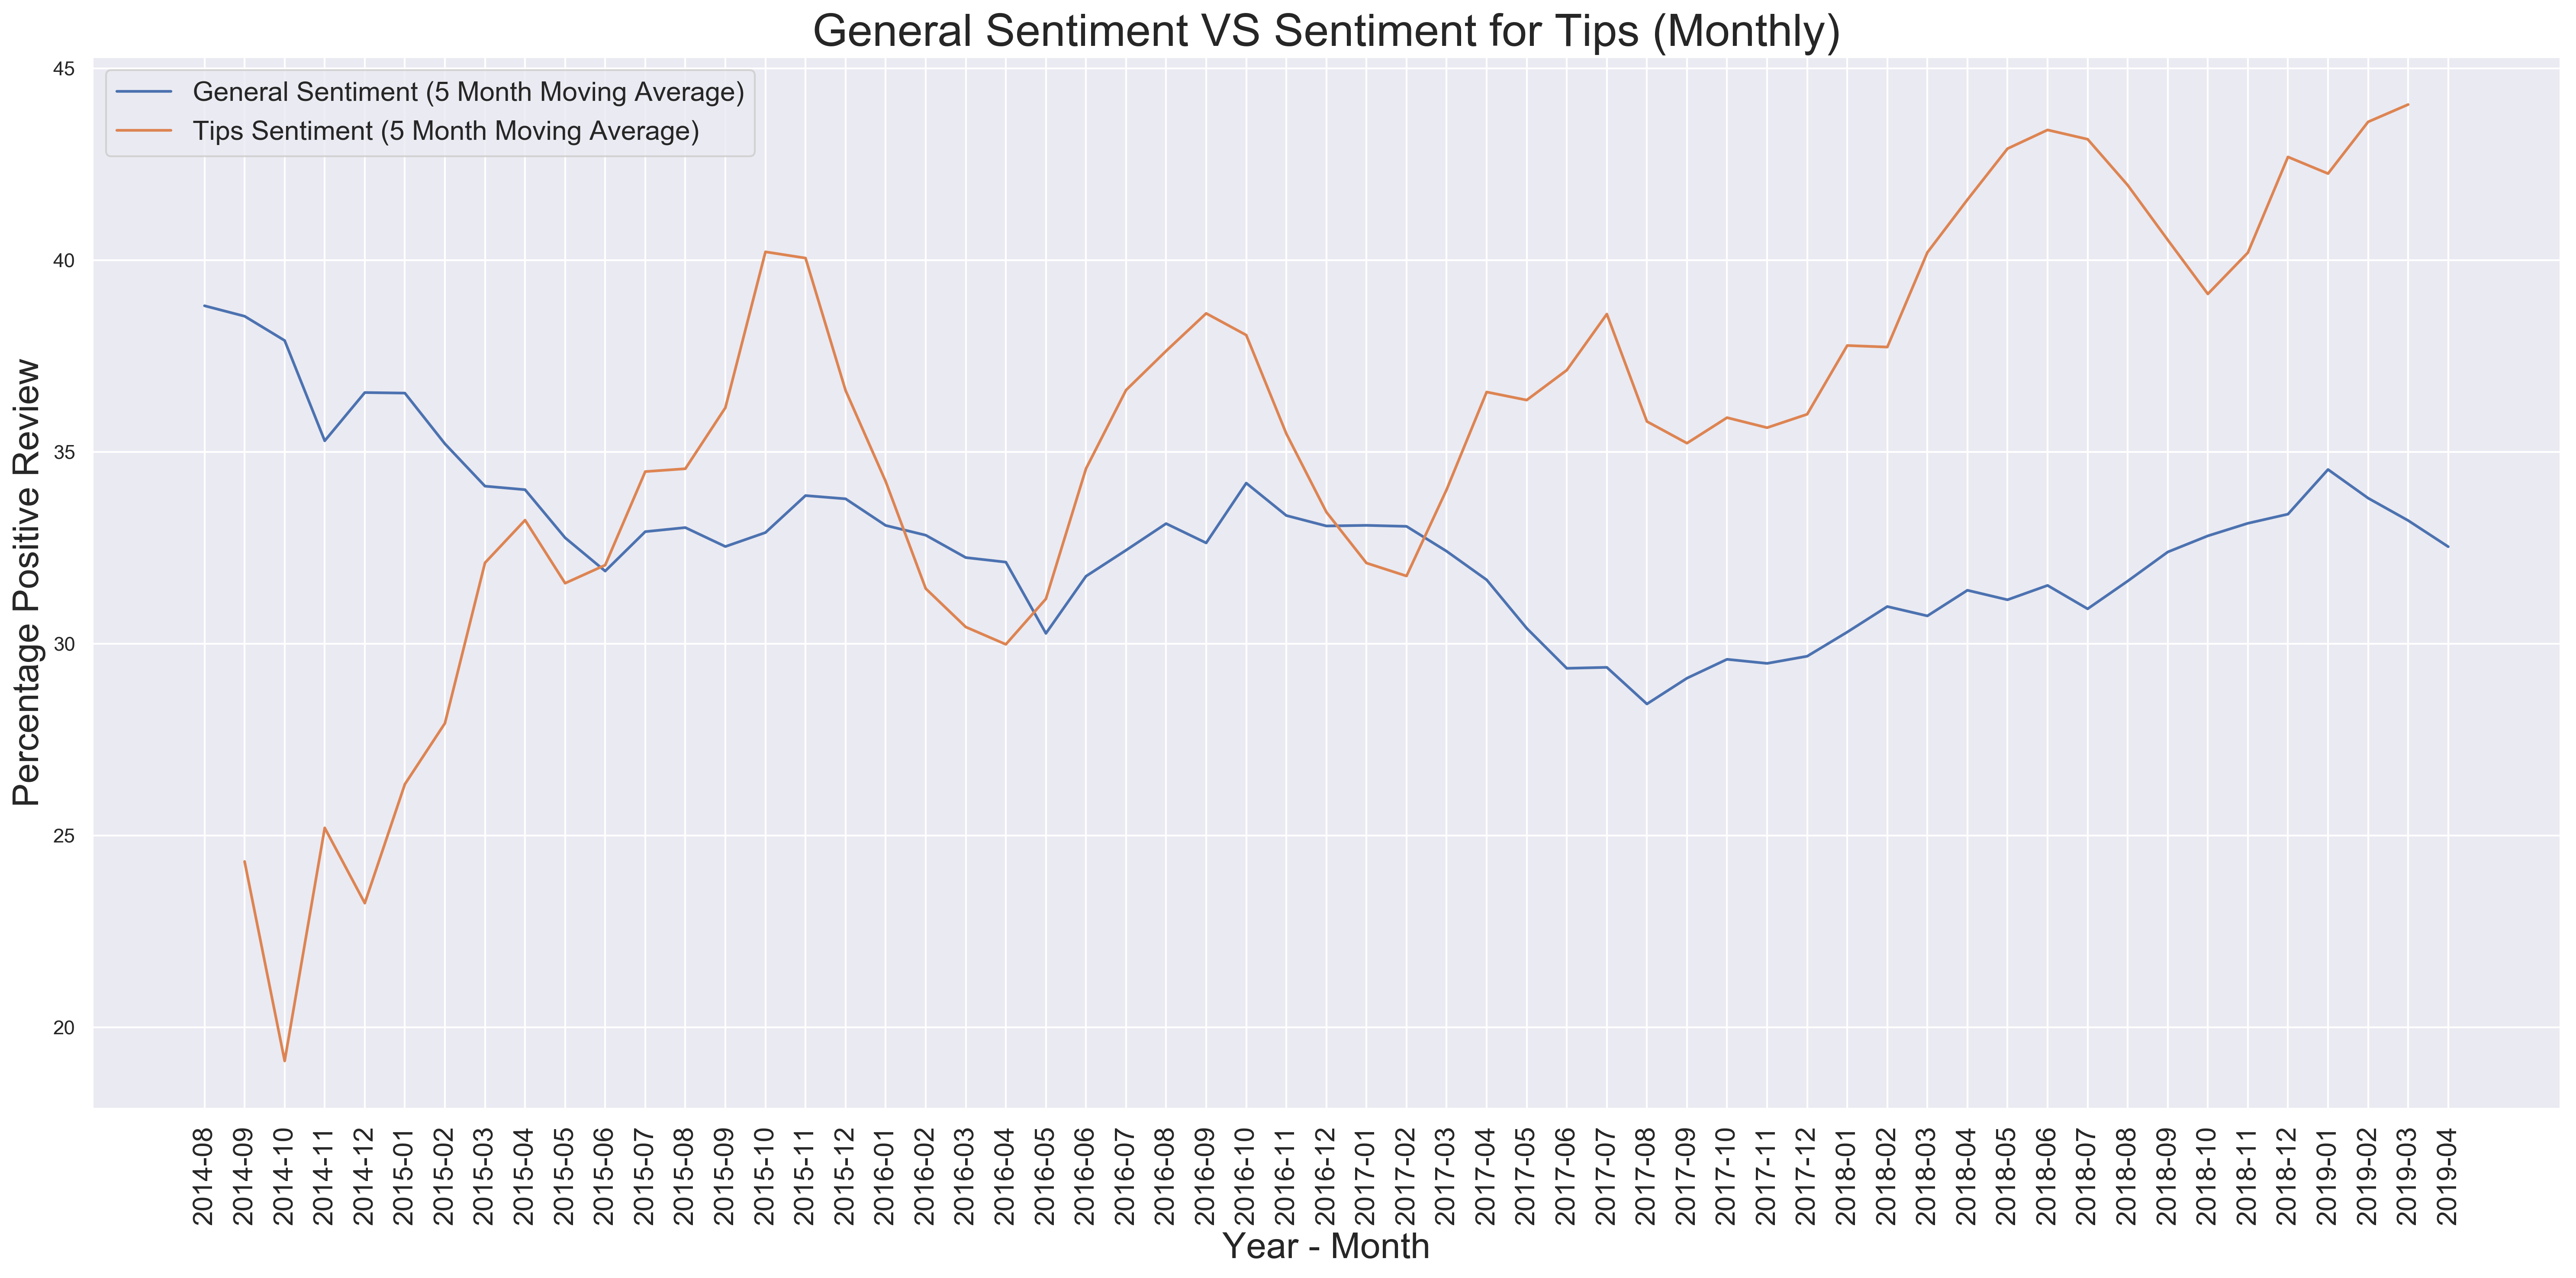

In [9]:
sns.set(style="darkgrid", rc = {'figure.figsize':(20,10),'figure.dpi':300})
sns.lineplot(x = year_month_all.year_month, y = year_month_all.average_sentiment.rolling(window=5).mean())
sns.lineplot(x = year_month_tips.year_month, y = year_month_tips.average_sentiment.rolling(window=5).mean())
plt.xticks(rotation = 90, fontsize = 15)
plt.xlabel('Year - Month', fontsize = 20)
plt.ylabel('Percentage Positive Review', fontsize = 20)
plt.legend(['General Sentiment (5 Month Moving Average)', 'Tips Sentiment (5 Month Moving Average)'], fontsize = 15)
plt.title('General Sentiment VS Sentiment for Tips (Monthly)', fontsize = 25)
plt.tight_layout()
plt.savefig('general_vs_tip_sentiment_month.png')

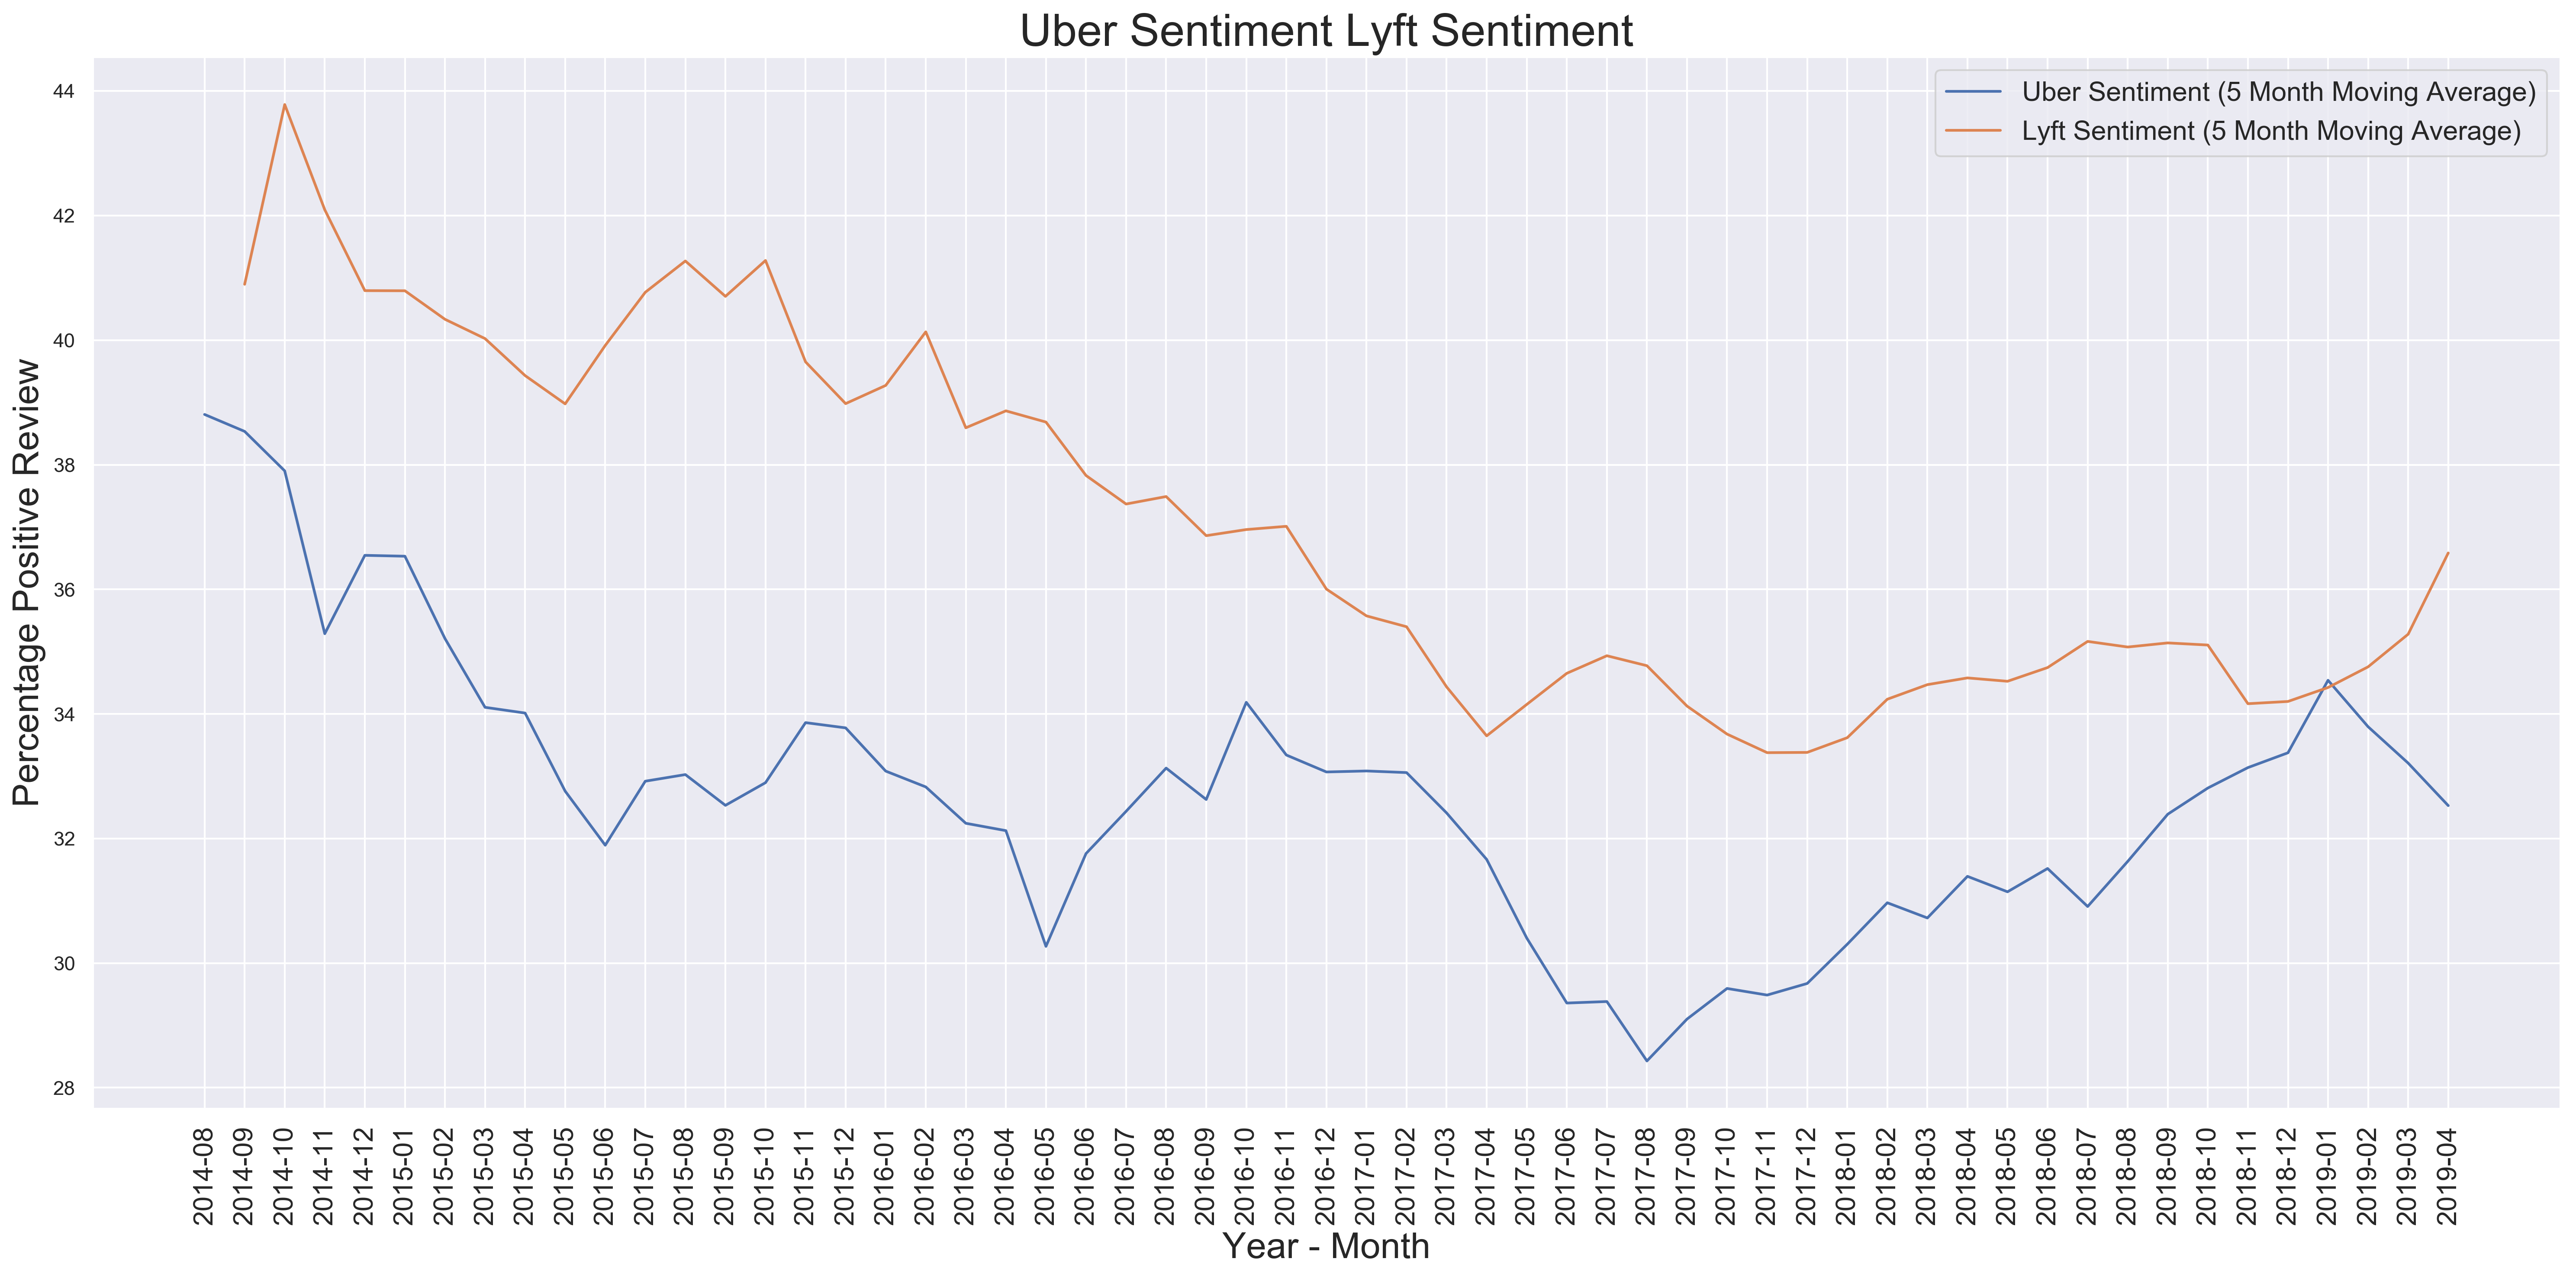

In [10]:
sns.set(style="darkgrid", rc = {'figure.figsize':(20,10),'figure.dpi':300})
sns.lineplot(x = year_month_all.year_month, y = year_month_all.average_sentiment.rolling(window=5).mean())
sns.lineplot(x = year_month_lyft.year_month, y = year_month_lyft.average_sentiment.rolling(window=5).mean())
plt.xticks(rotation = 90, fontsize = 15)
plt.xlabel('Year - Month', fontsize = 20)
plt.ylabel('Percentage Positive Review', fontsize = 20)
plt.legend(['Uber Sentiment (5 Month Moving Average)', 'Lyft Sentiment (5 Month Moving Average)'], fontsize = 15)
plt.title('Uber Sentiment Lyft Sentiment', fontsize = 25)
plt.tight_layout()
plt.savefig('uber_vs_lyft_sentiment_month.png')

In [13]:
tips_data['concat_quarter'] = tips_data.year.map(str)+'-'+tips_data.quarter.map(str)
all_data['concat_quarter'] = all_data.year.map(str)+'-'+all_data.quarter.map(str)

In [14]:
year_quarter_tips = tips_data.groupby('concat_quarter', as_index=False).agg({'pred_cat':precent_calculation,'polarity':'mean'}).rename(
    columns={'pred_cat':'average_sentiment', 'concat_quarter':'year_quarter', 'polarity':'mean_polarity'})

In [15]:
year_quarter_all = all_data.groupby('concat_quarter', as_index=False).agg({'pred_cat':precent_calculation,'polarity':'mean'}).rename(
    columns={'pred_cat':'average_sentiment', 'concat_quarter':'year_quarter', 'polarity':'mean_polarity'})

In [16]:
year_quarter_lyft = lyft_data.groupby('concat_quarter', as_index=False).agg({'pred_cat':precent_calculation,'polarity':'mean'}).rename(
    columns={'pred_cat':'average_sentiment', 'concat_quarter':'year_quarter', 'polarity':'mean_polarity'})

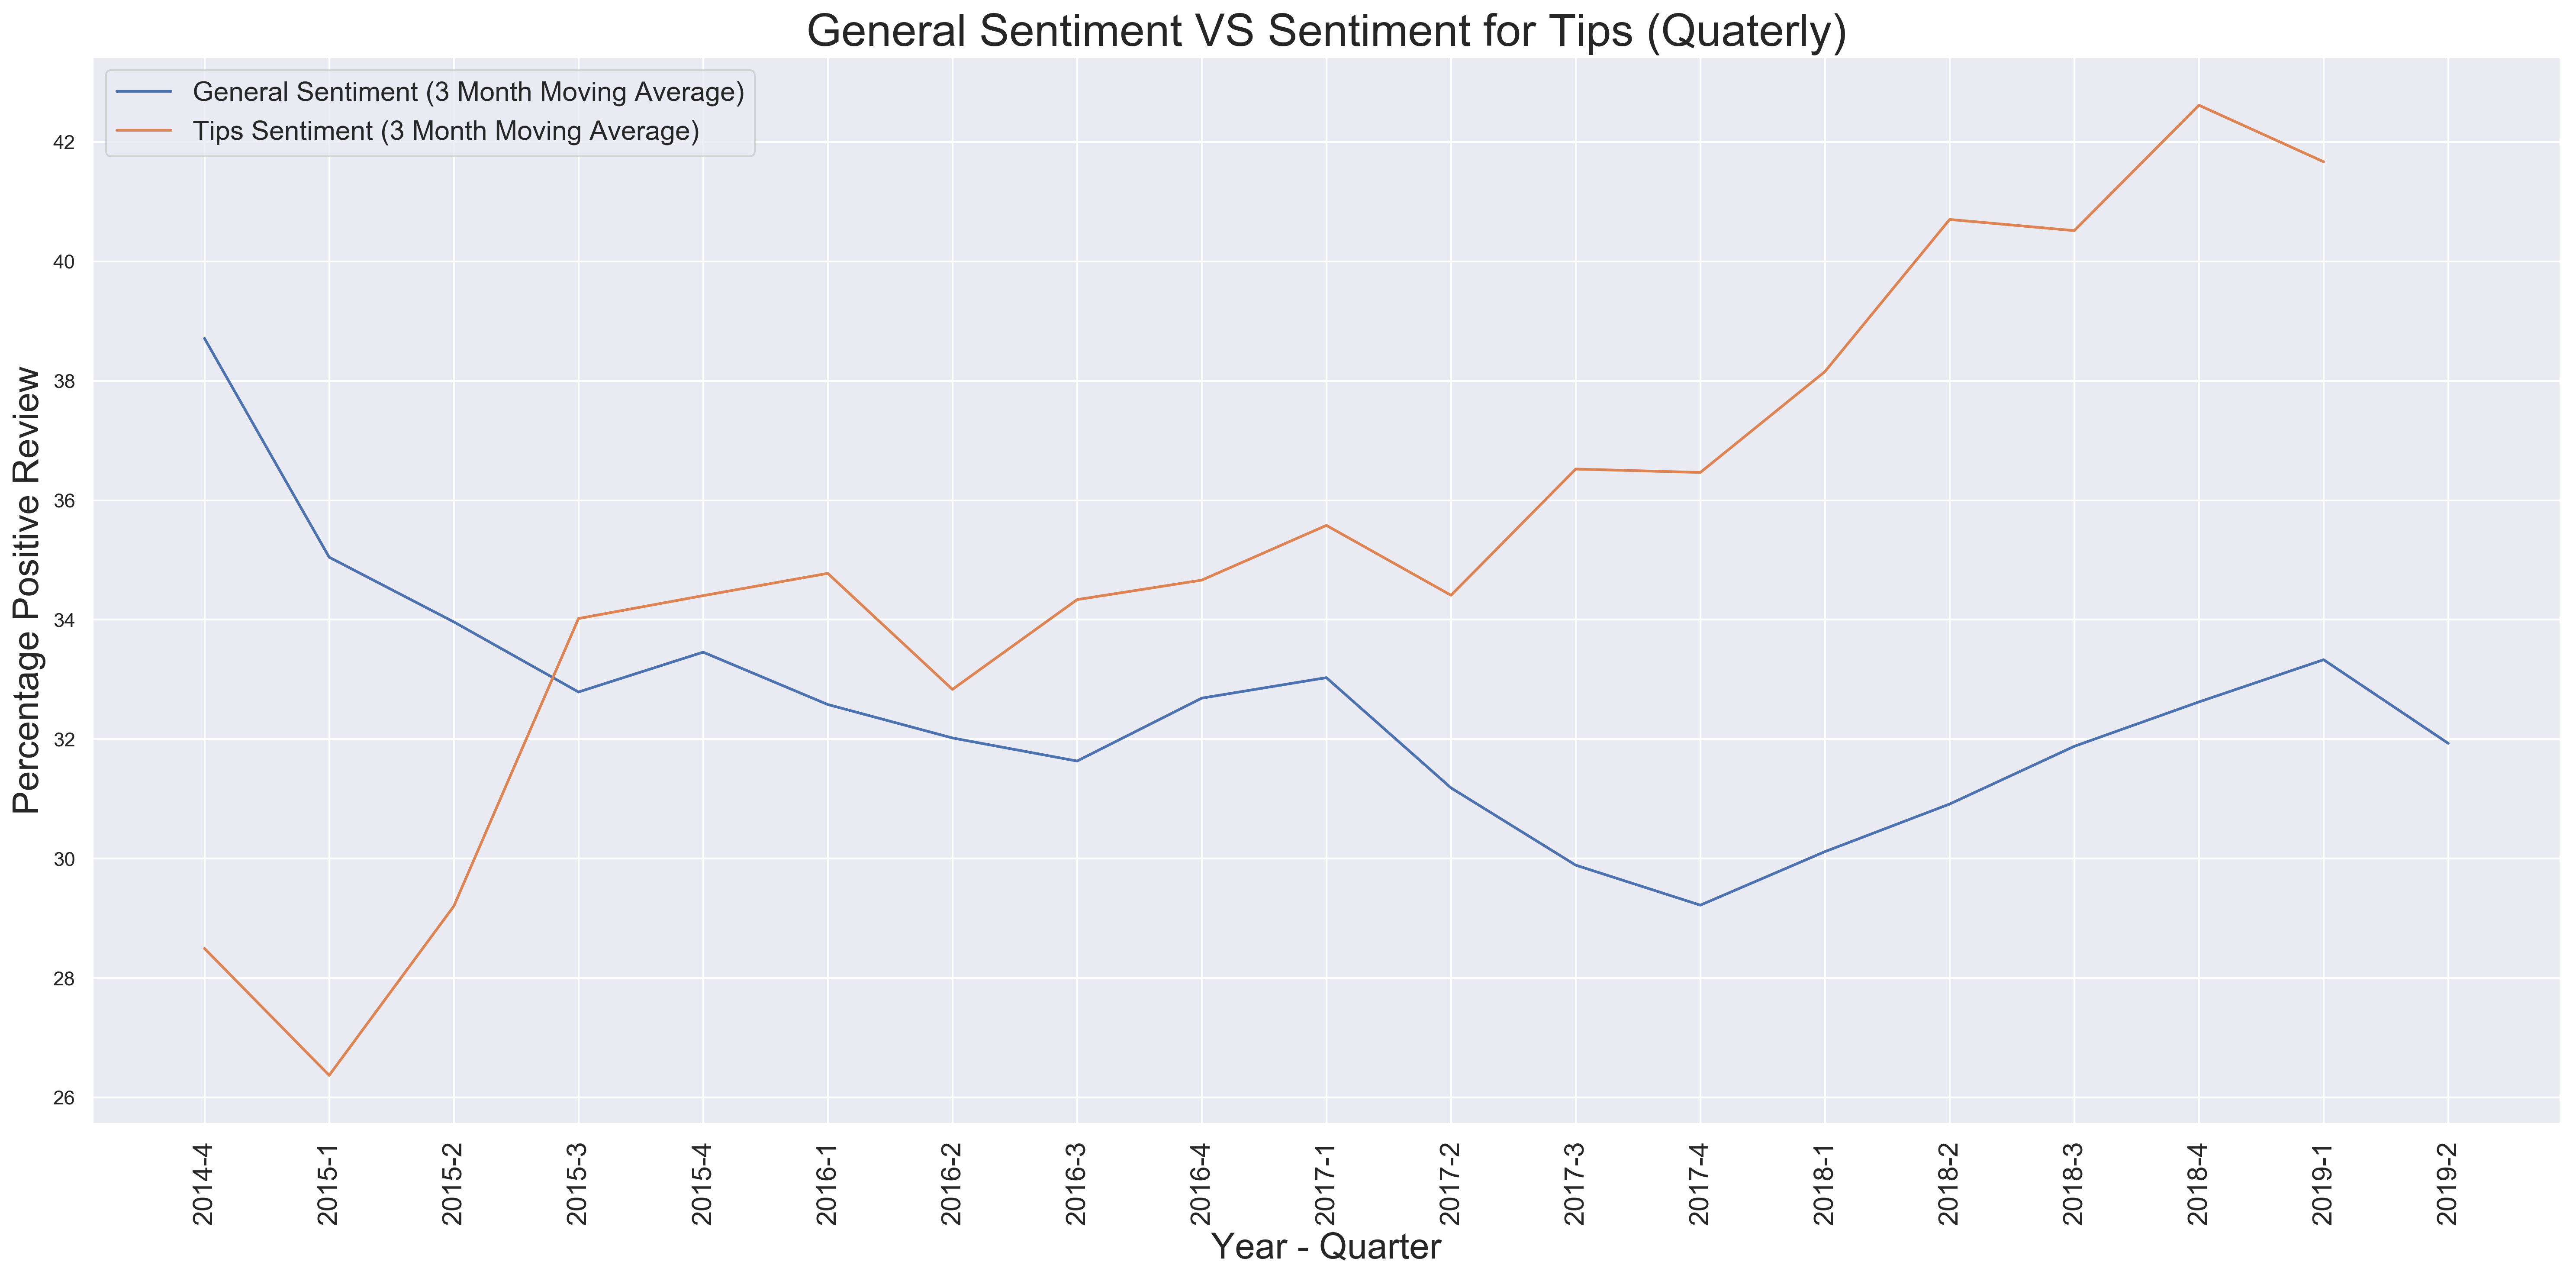

In [17]:
sns.set(style="darkgrid", rc = {'figure.figsize':(20,10),'figure.dpi':300})
sns.lineplot(x = year_quarter_all.year_quarter, y = year_quarter_all.average_sentiment.rolling(window=3).mean())
sns.lineplot(x = year_quarter_tips.year_quarter, y = year_quarter_tips.average_sentiment.rolling(window=3).mean())
plt.xticks(rotation = 90, fontsize = 15)
plt.xlabel('Year - Quarter', fontsize = 20)
plt.ylabel('Percentage Positive Review', fontsize = 20)
plt.legend(['General Sentiment (3 Month Moving Average)', 'Tips Sentiment (3 Month Moving Average)'], fontsize = 15)
plt.title('General Sentiment VS Sentiment for Tips (Quaterly)', fontsize = 25)
plt.tight_layout()
plt.savefig('general_vs_tip_sentiment_quarter.png')

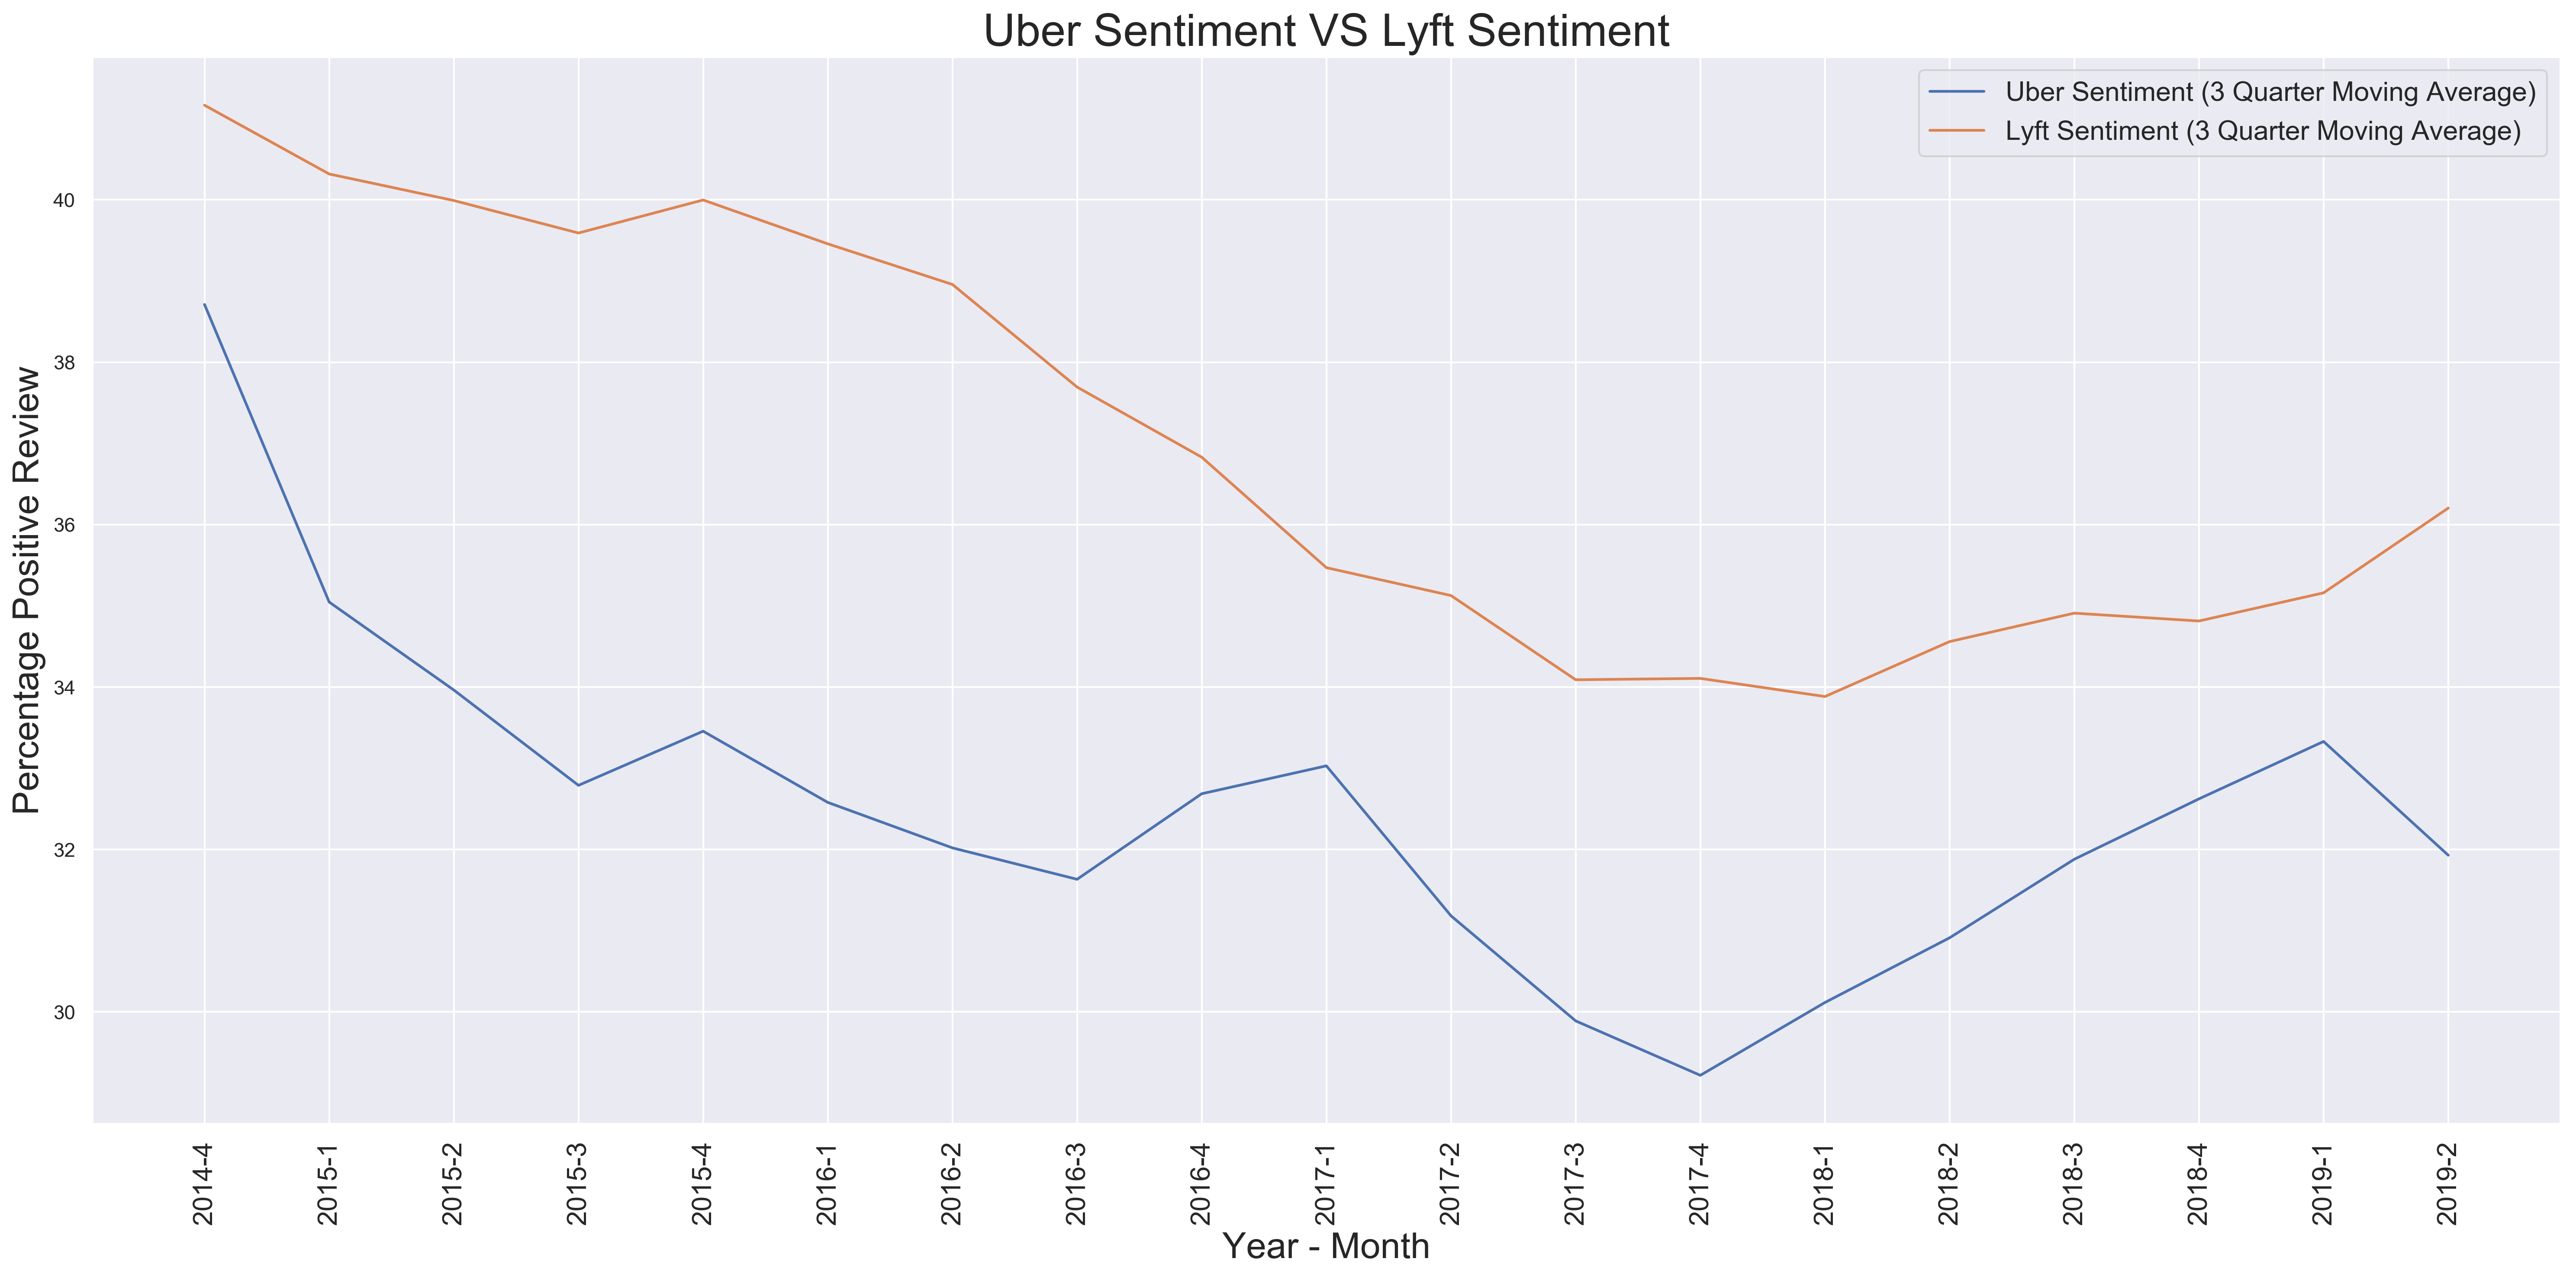

In [18]:
sns.set(style="darkgrid", rc = {'figure.figsize':(20,10),'figure.dpi':300})
sns.lineplot(x = year_quarter_all.year_quarter, y = year_quarter_all.average_sentiment.rolling(window=3).mean())
sns.lineplot(x = year_quarter_lyft.year_quarter, y = year_quarter_lyft.average_sentiment.rolling(window=3).mean())
plt.xticks(rotation = 90, fontsize = 15)
plt.xlabel('Year - Month', fontsize = 20)
plt.ylabel('Percentage Positive Review', fontsize = 20)
plt.legend(['Uber Sentiment (3 Quarter Moving Average)', 'Lyft Sentiment (3 Quarter Moving Average)'], fontsize = 15)
plt.title('Uber Sentiment VS Lyft Sentiment', fontsize = 25)
plt.tight_layout()
plt.savefig('uber_vs_lyft_sentiment_quarter.png')

In [21]:
tips_semi_month_sentiment = pd.DataFrame(tips_data.pred_cat.resample('SMS').apply(precent_calculation))
all_semi_month_sentiment = pd.DataFrame(all_data.pred_cat.resample('SMS').apply(precent_calculation))

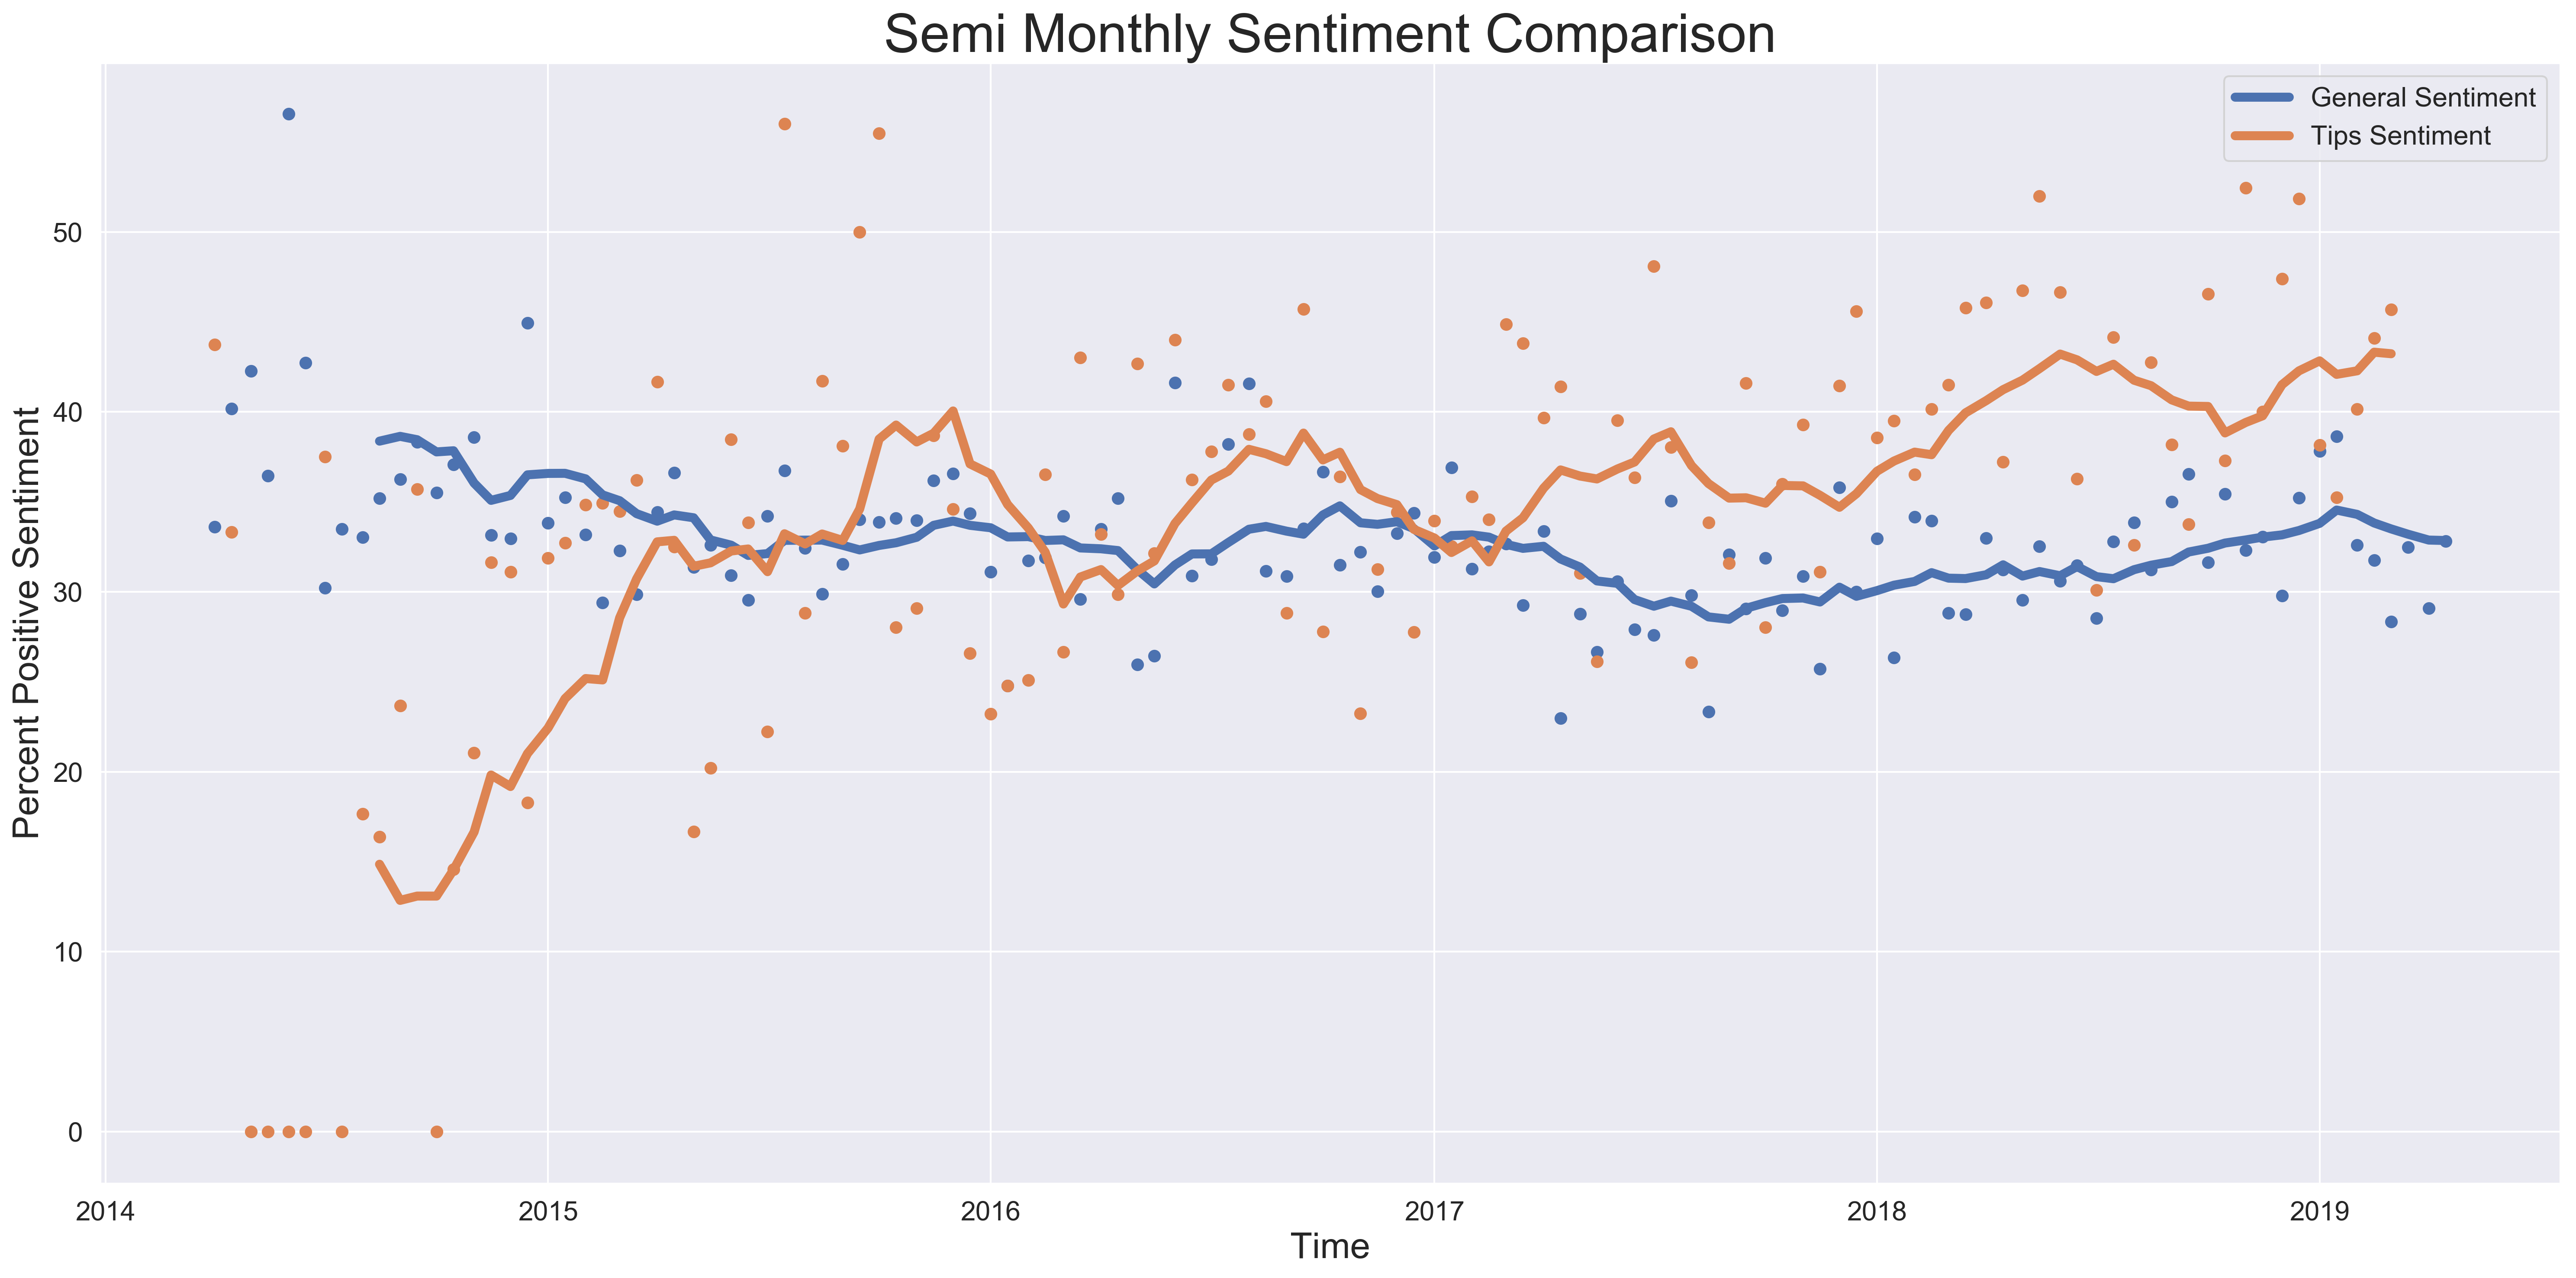

In [22]:
plt.figure(figsize=(20,10), dpi = 300)
plt.title('Semi Monthly Sentiment Comparison', fontsize = 30)
plt.scatter(x = all_semi_month_sentiment.index, y = all_semi_month_sentiment.pred_cat)
plt.plot(all_semi_month_sentiment.pred_cat.rolling(window = 10).mean(), linewidth = 5)
plt.scatter(x = tips_semi_month_sentiment.index, y = tips_semi_month_sentiment.pred_cat)
plt.plot(tips_semi_month_sentiment.pred_cat.rolling(window = 10).mean(), linewidth = 5)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Percent Positive Sentiment', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(['General Sentiment', 'Tips Sentiment'], fontsize = 15)
plt.tight_layout()
plt.savefig('semi_monthly_sentiment_comparison.png')

In [23]:
aug_sep_2017 = tips_data[(tips_data.concat_month == '2017-08') | (tips_data.concat_month == '2017-09')]

In [24]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

In [25]:
def tfidf_weights(tokenized_list):
    dictionary = Dictionary(tokenized_list)
    vectors = [dictionary.doc2bow(text) for text in tokenized_list]
    tfidf = TfidfModel(vectors)
    weights = tfidf[vectors[0]]
    weights = [(dictionary[pair[0]], pair[1]) for pair in weights]
    return dict(weights)

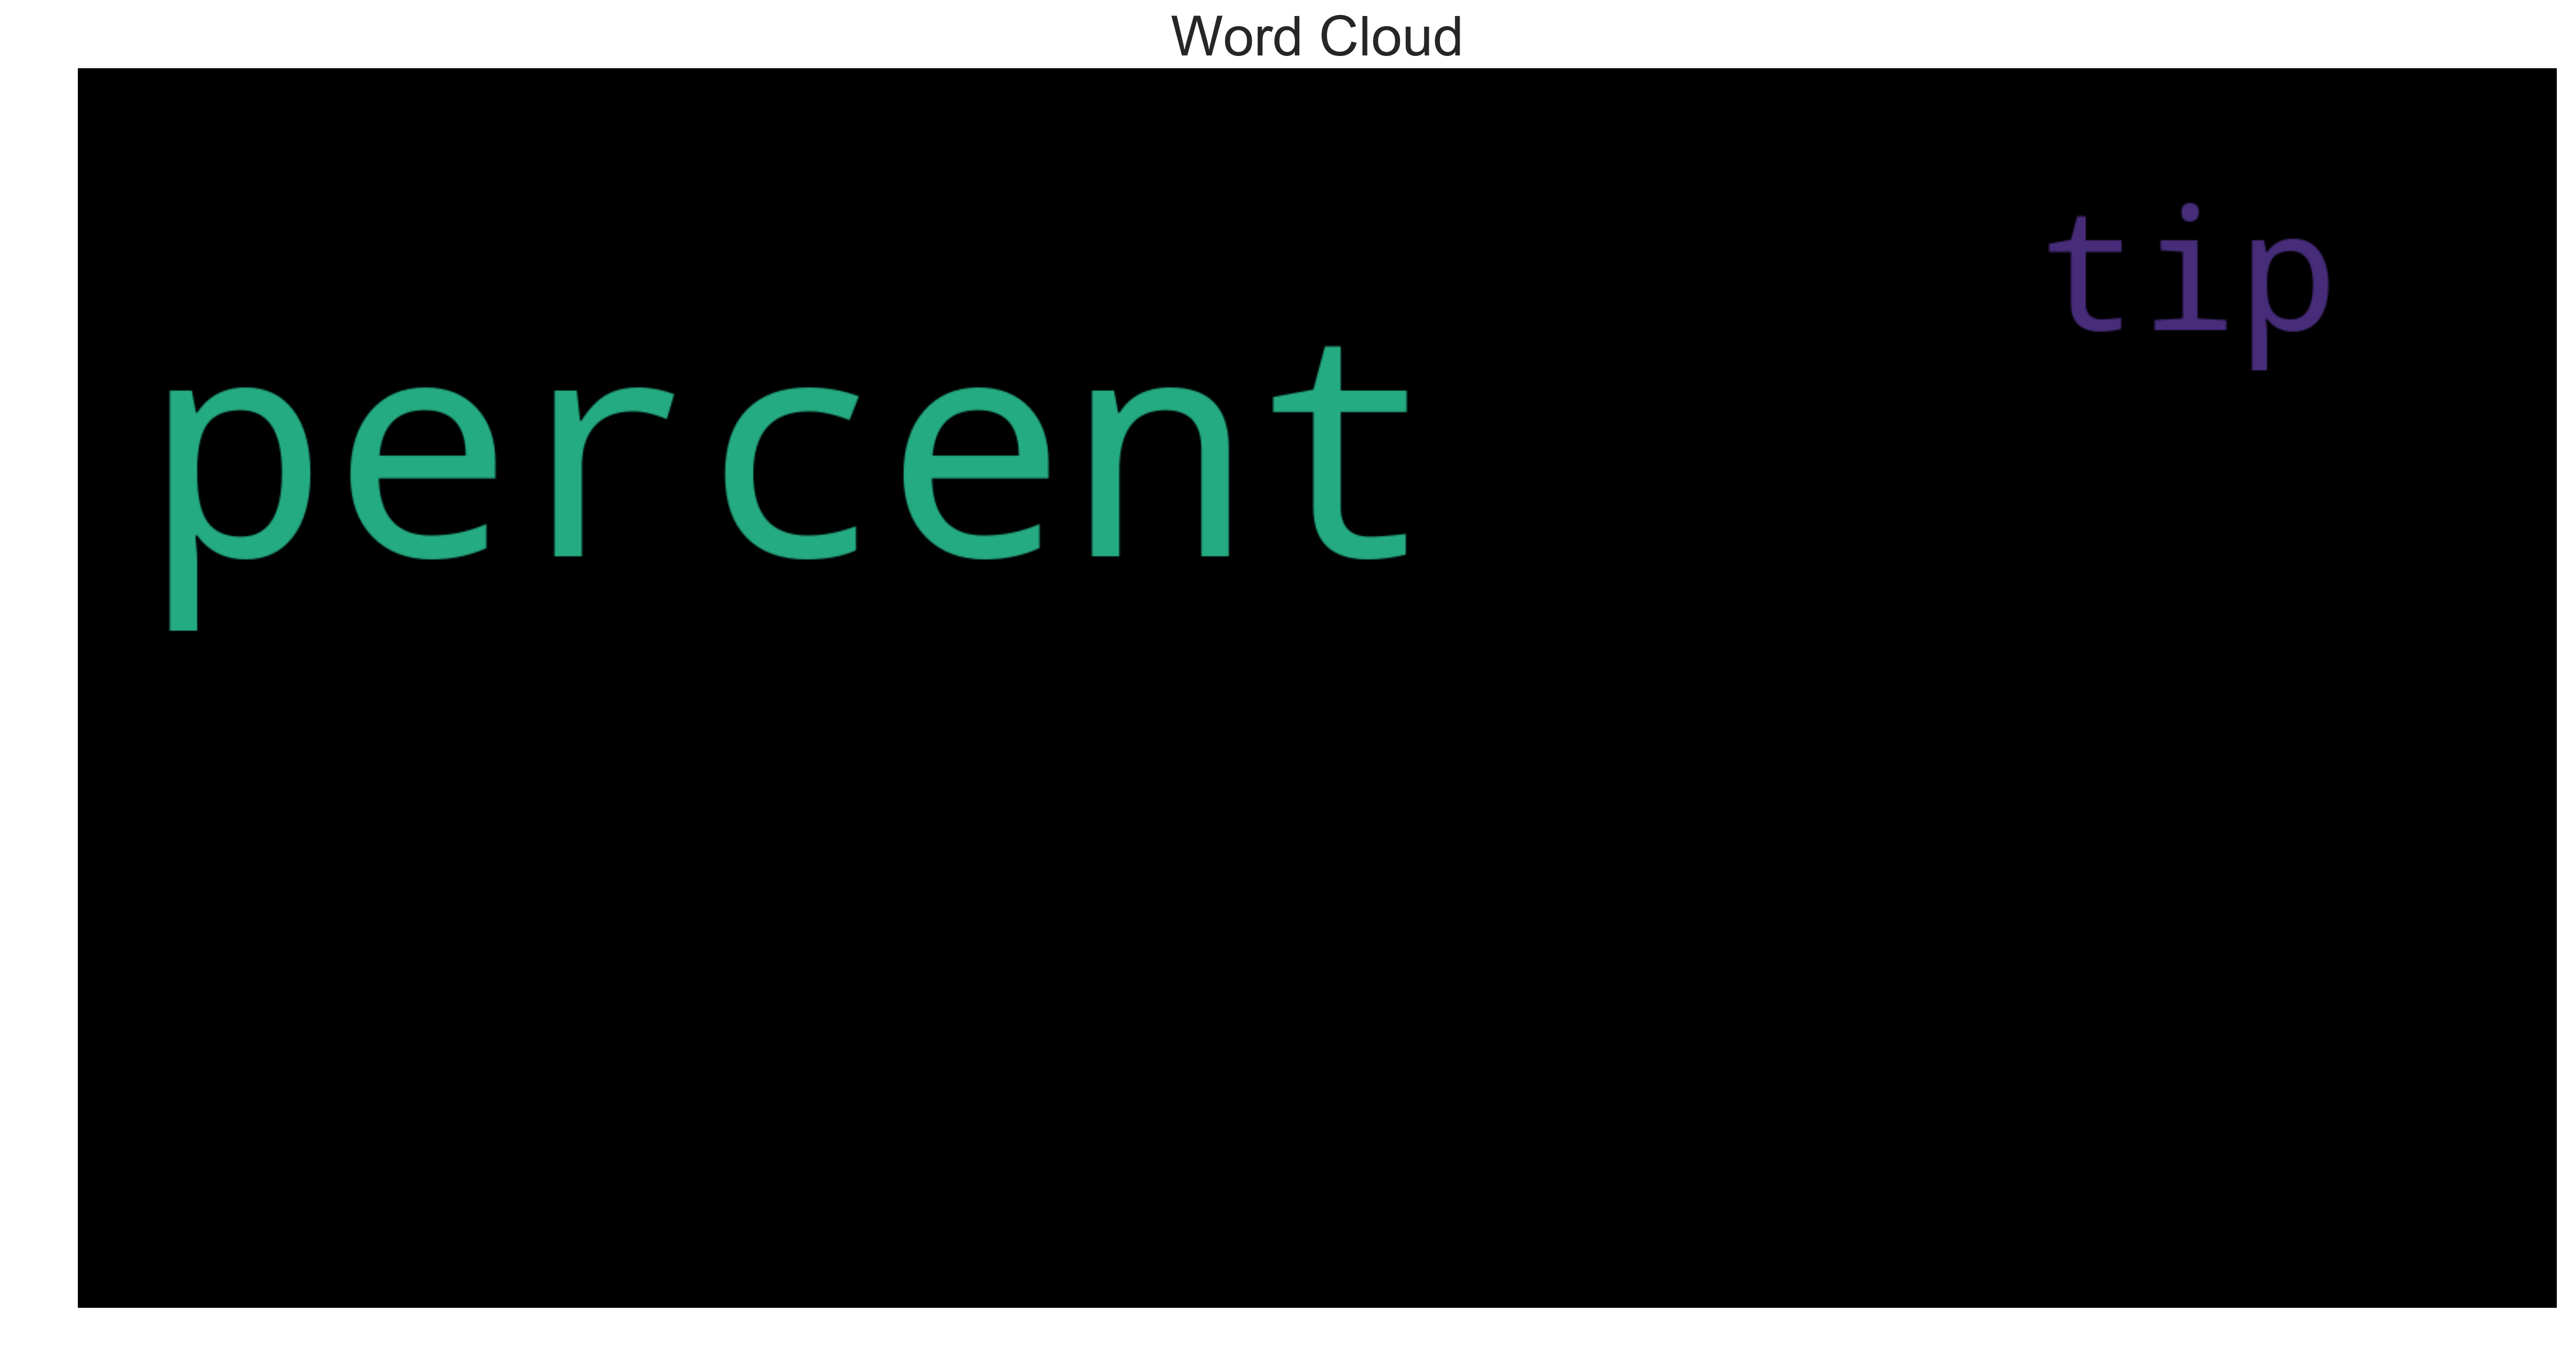

In [26]:
word_cloud_plot(tfidf_weights(aug_sep_2017.cleaned_message.values))

In [50]:
oct_2016_april_2017 = tips_data[tips_data.concat_month.isin(['2016-12', '2017-01', '2017-02'])]

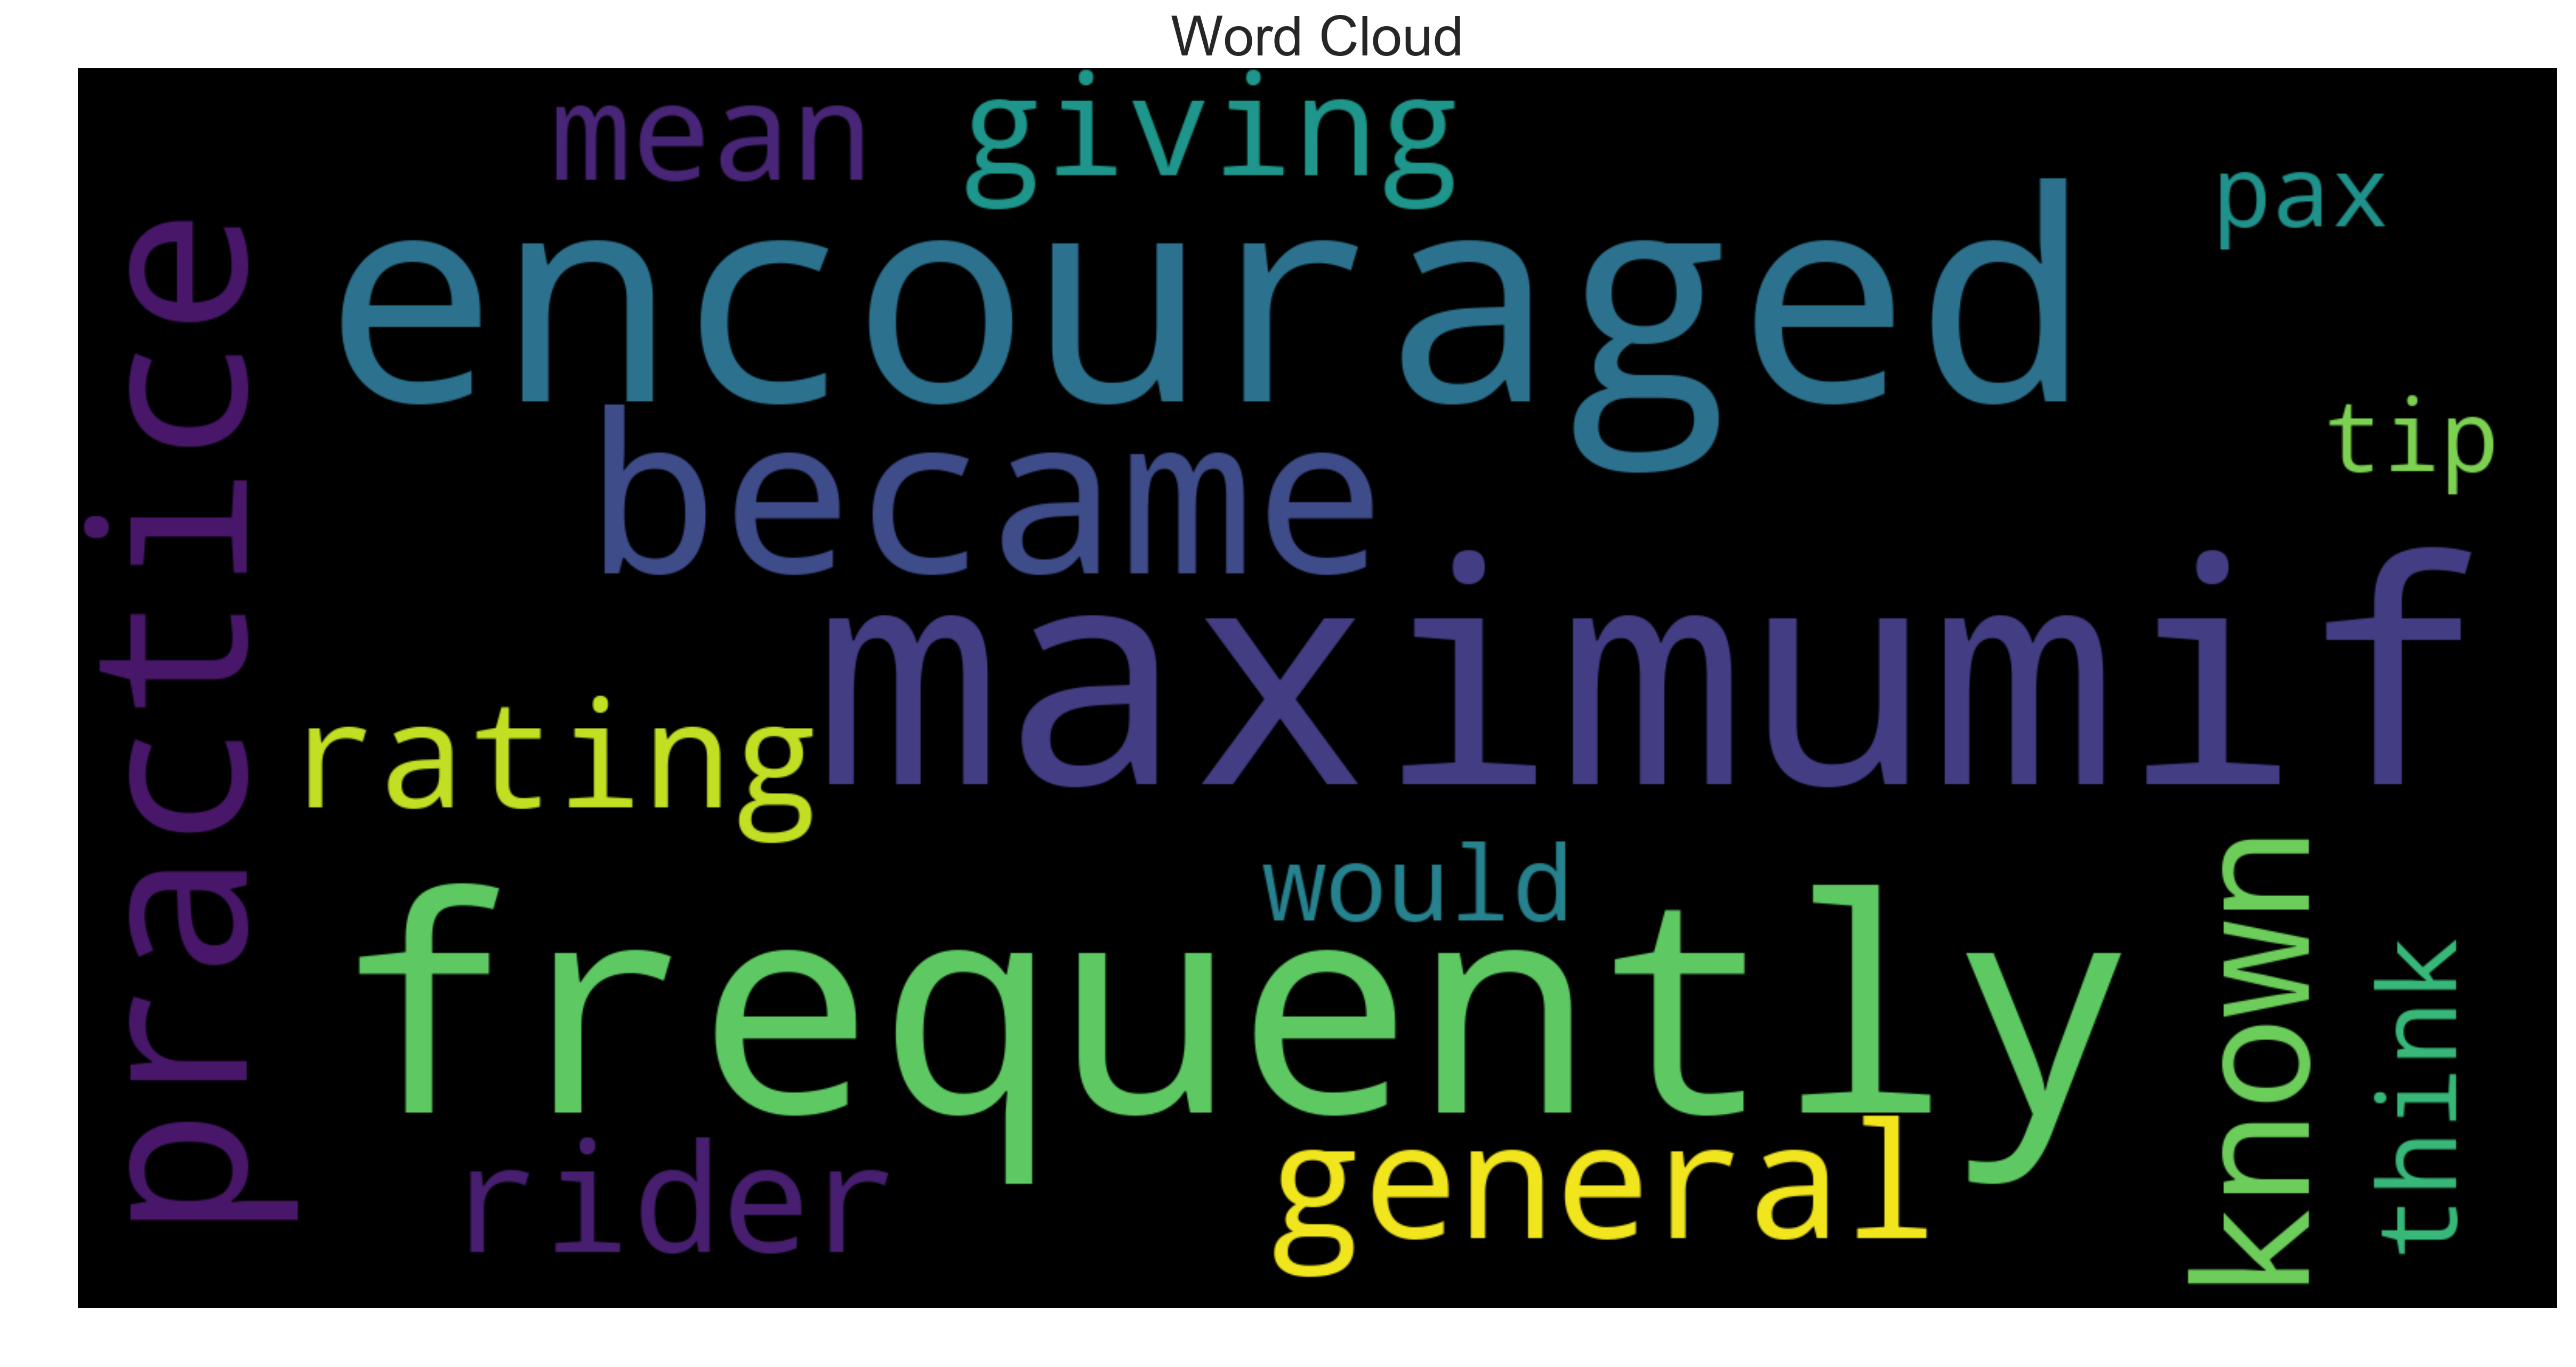

In [51]:
word_cloud_plot(tfidf_weights(oct_2016_april_2017.cleaned_message.values))

In [52]:
[' '.join(text) for text in oct_2016_april_2017.cleaned_message if 'encouraged' in text]

['think giving rating rider tip tip mean rating maximumif became general practice known rider would pax encouraged tip frequently',
 'maven saidwhat think giving rating rider tip tip mean rating maximumif became general practice known rider would pax encouraged tip frequentlyclick expandagain nothing promise nothing vegasr saidbut driver know fense accepting ride better infoclick expanda sensible ideal doenst play real worldoveruber saidwordi rate everyone tip long arent unseemly fashion rate driver rate five even though dont mint water time aux cord always help luggage large item going luggage areasome provide little extra consider service beyond dont thats going change rate nonproviders click expandreally get beyond badge even told way give star could always tip better driver like incentive stay platform thats good riderno way give star exchange happened real ing life',
 'think giving rating rider tip tip mean rating maximumif became general practice known rider would pax encouraged 

In [48]:
dec_2015_july_2016 = tips_data[tips_data.concat_month.isin(['2016-02', '2016-03', '2016-04', '2016-05'])]

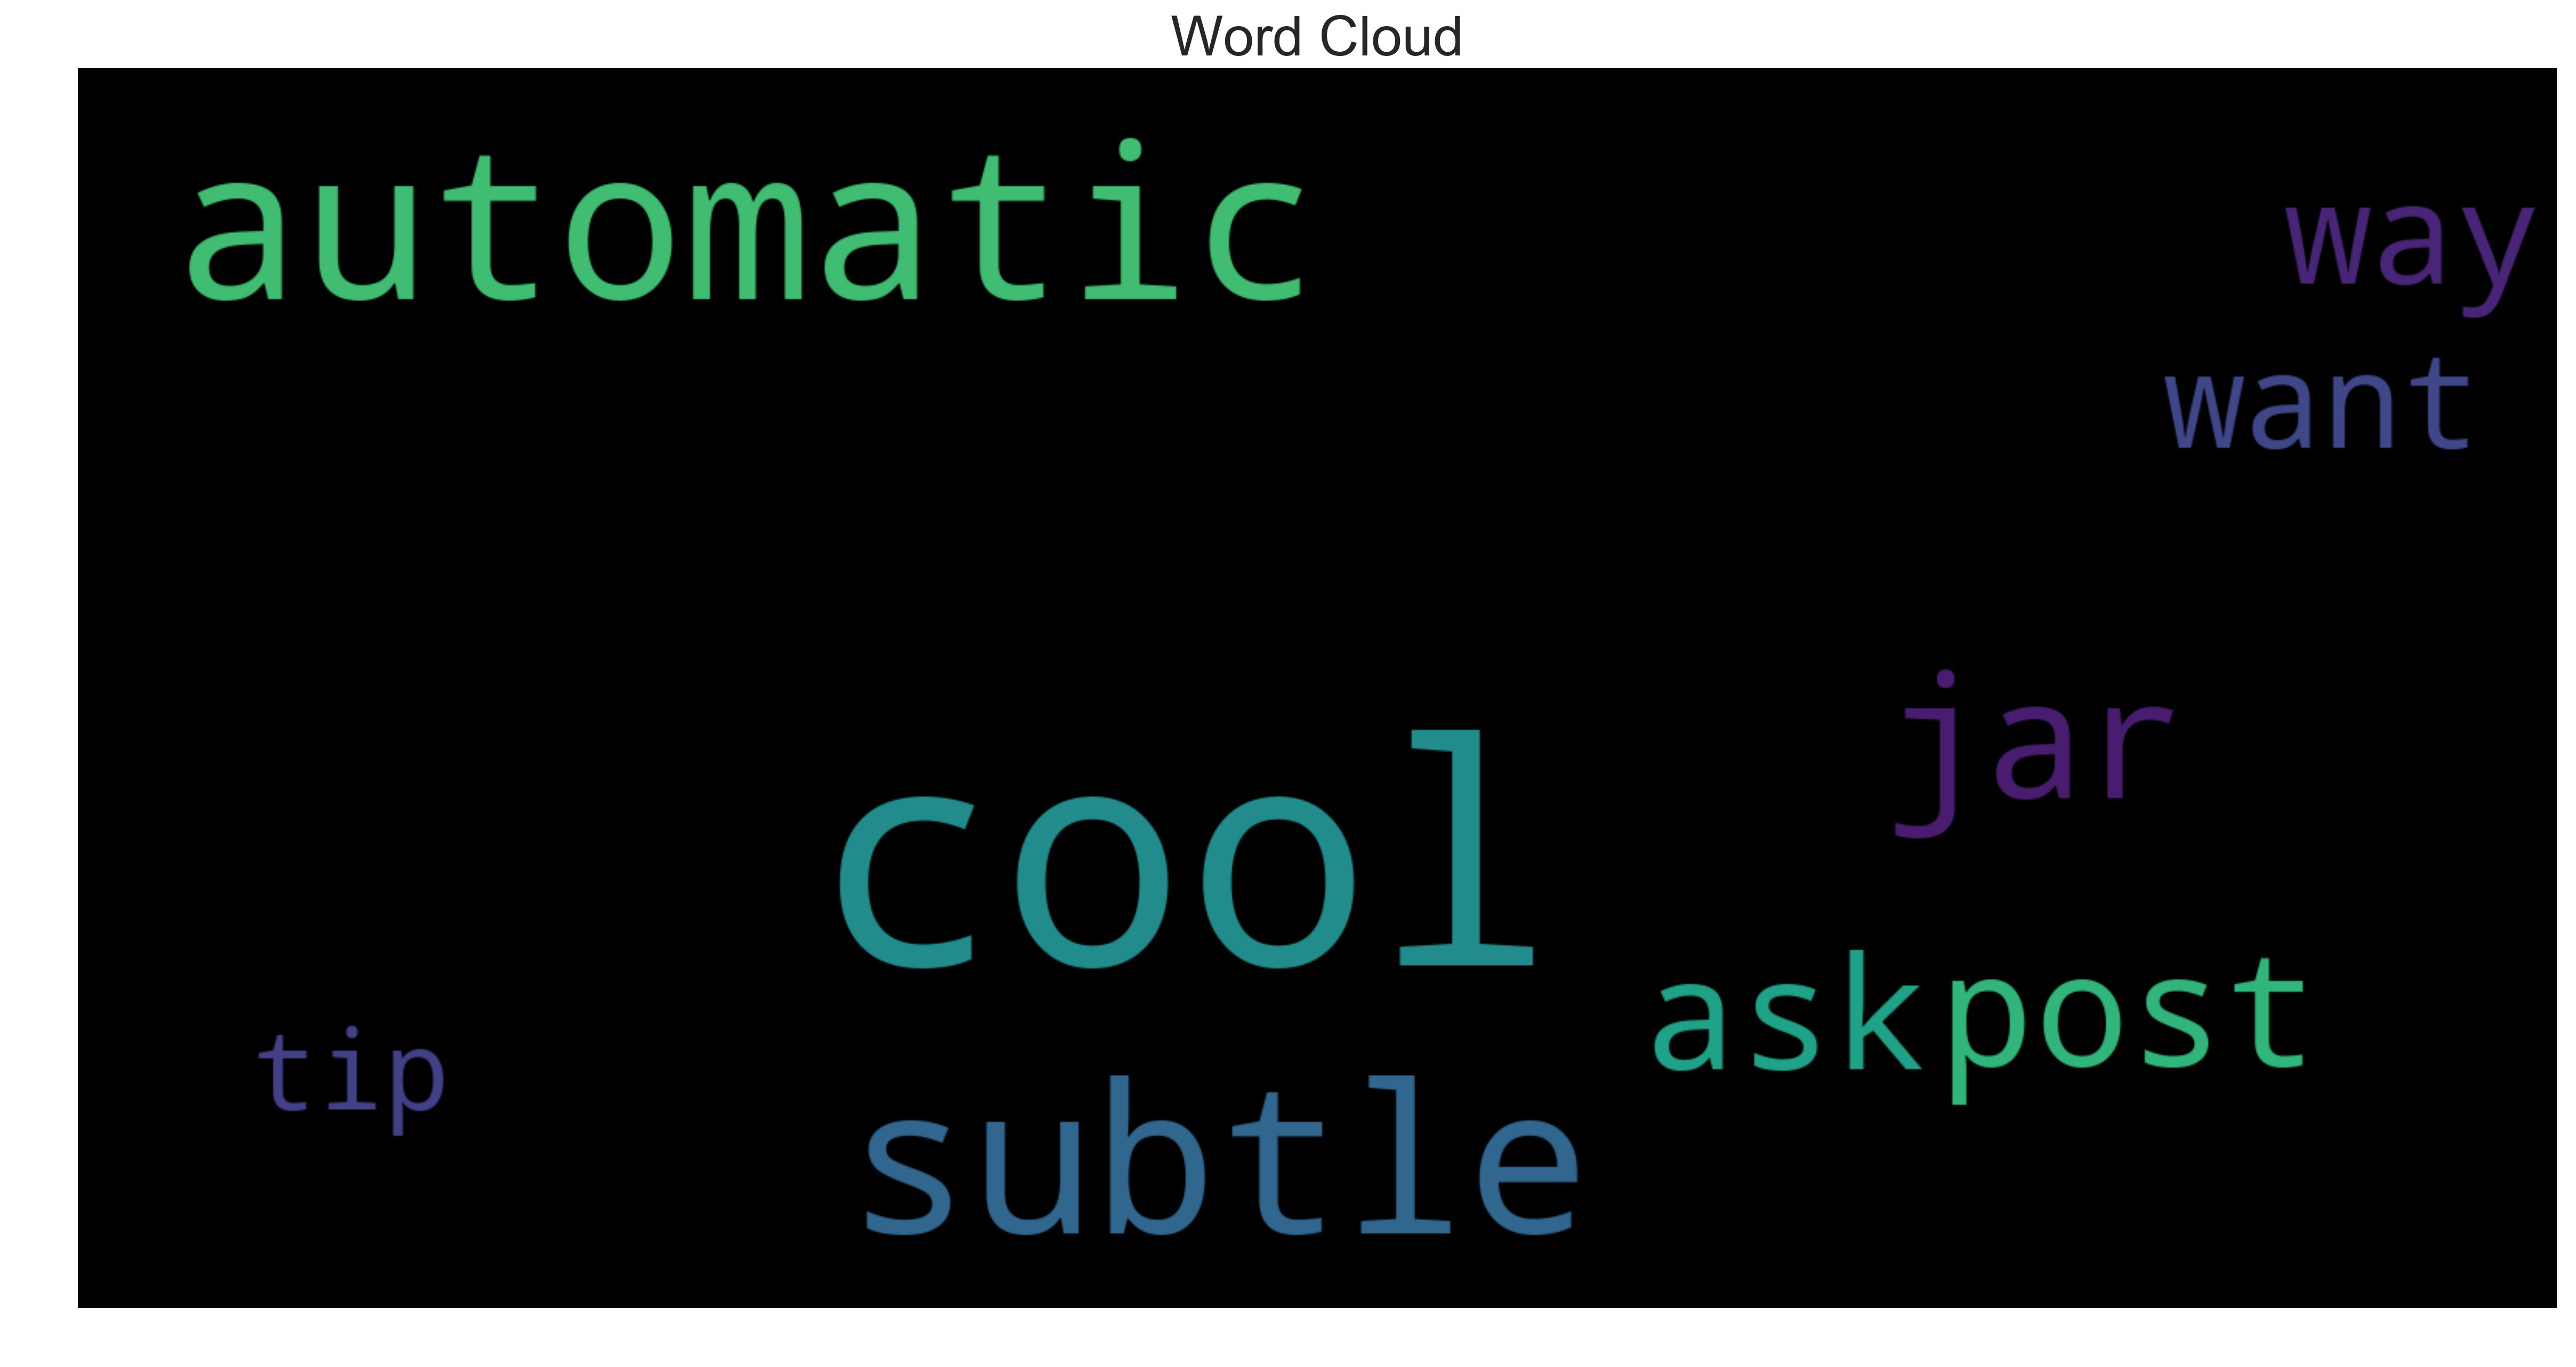

In [49]:
word_cloud_plot(tfidf_weights(dec_2015_july_2016.cleaned_message.values))

In [53]:
aug_sep_2015 = tips_data[tips_data.concat_month.isin(['2015-08', '2015-09'])]

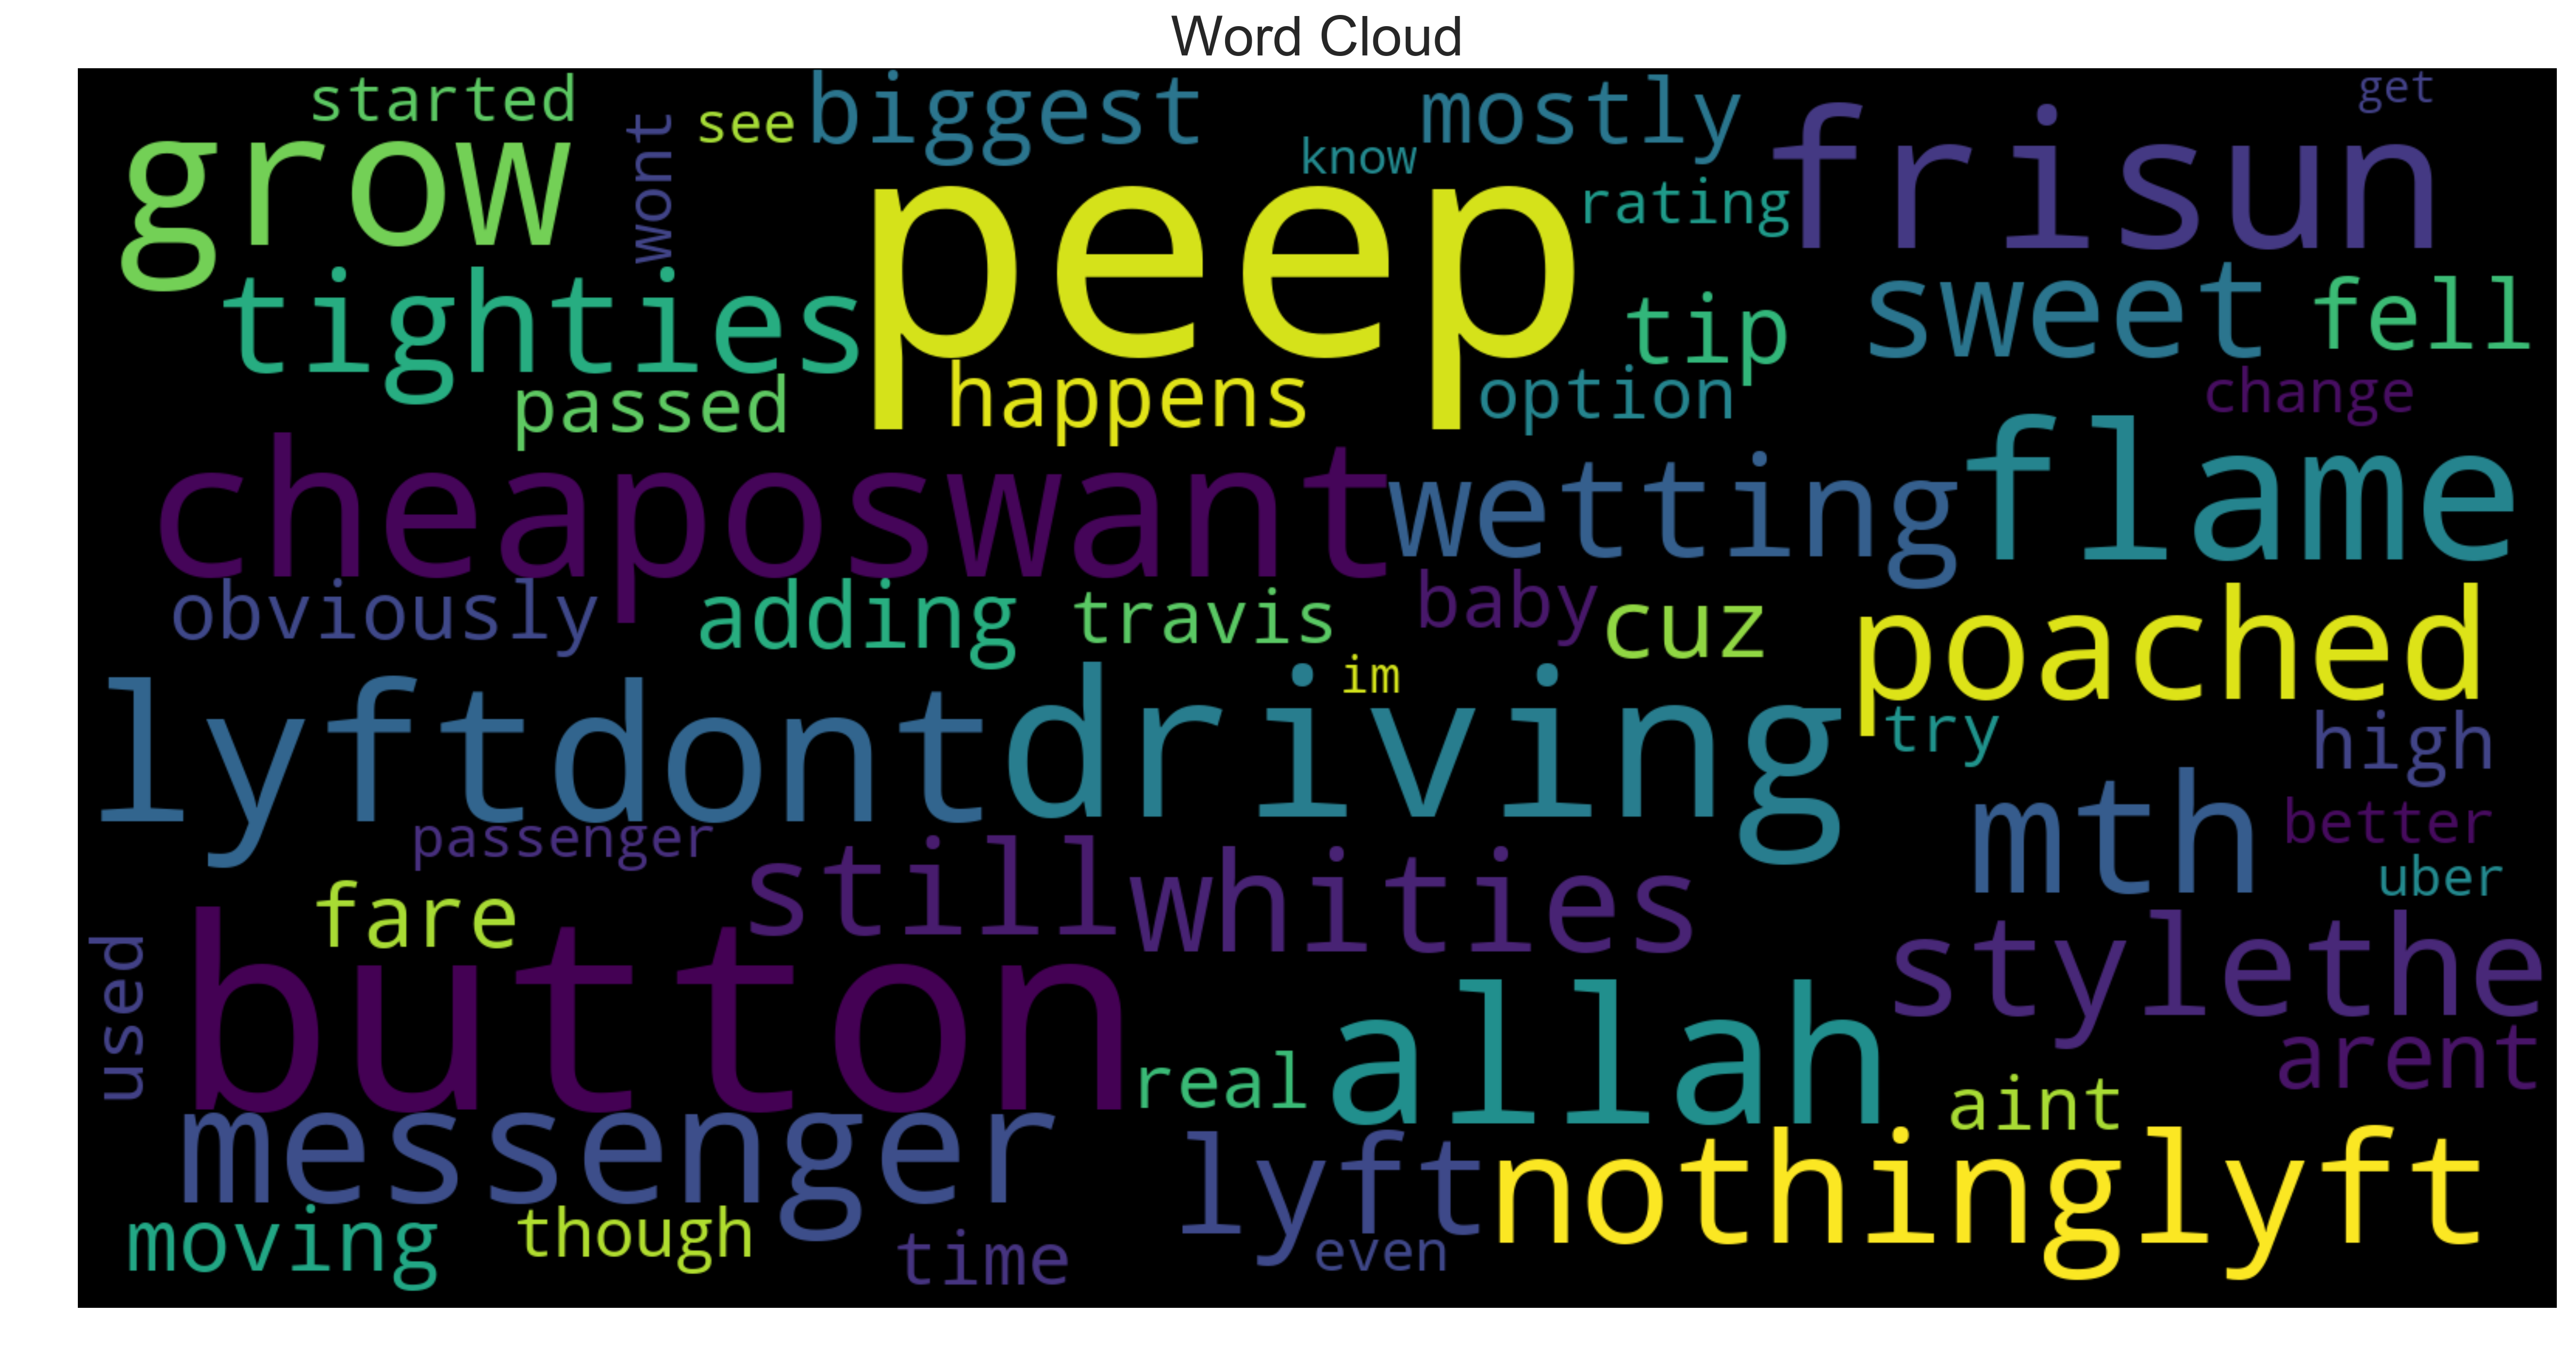

In [54]:
word_cloud_plot(tfidf_weights(aug_sep_2015.cleaned_message.values))

In [70]:
import statsmodels.api as sm

In [69]:
model = sm()

AttributeError: 'Int64Index' object has no attribute 'apply'

In [76]:
year_month_tips.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58], dtype=int64)